# Task 5 — Sales Data Analysis
Load `sales.csv`, compute Sales = Quantity * UnitPrice, group, and plot results.


In [4]:
# Cell 2 - imports and quick checks
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

print("Current folder:", os.getcwd())
print("Files here:", os.listdir("."))


Current folder: C:\Users\DELL
Files here: ['.anaconda', '.bash_history', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.ms-ad', '.vscode', '3D Objects', 'anaconda_projects', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{e48e8cf3-7d2e-11f0-834b-d621ead90daf}.TM.blf', 'NTUSER.DAT{e48e8cf3-7d2e-11f0-834b-d621ead90daf}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{e48e8cf3-7d2e-11f0-834b-d621ead90daf}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'Pictures', 'PrintHood', 'react_same_proj', 'Recent', 'sales.csv', 'Saved Games', 'Searches', 'SendTo', 'Start Menu', 'task5-sales-analysis.ipynb', 'Templates', 'Untitled.ipynb', 'Videos']


In [5]:
# Cell 3 - load CSV, with clear errors if missing or empty
p = Path("sales.csv")
if not p.exists():
    raise FileNotFoundError(f"sales.csv not found in {os.getcwd()}. Please save the CSV there.")
if p.stat().st_size == 0:
    raise ValueError("sales.csv exists but is empty. Please re-create it with sample data.")

# Read and parse Date column
df = pd.read_csv(p, parse_dates=["Date"])
print("Loaded sales.csv rows:", len(df))
df.head()


Loaded sales.csv rows: 12


,Date,Region,Product,Quantity,UnitPrice
0,2025-01-05,North,Widget A,10,9.99
1,2025-01-12,South,Widget B,5,19.50
2,2025-02-03,North,Widget C,8,12.00
3,2025-02-15,East,Widget A,7,9.99
4,2025-03-01,West,Widget B,12,19.50


In [6]:
# Cell 4 - ensure numeric and create Sales column
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
df['Sales'] = df['Quantity'] * df['UnitPrice']

# drop rows where Sales could not be computed
df = df.dropna(subset=['Sales']).reset_index(drop=True)
df.head()


,Date,Region,Product,Quantity,UnitPrice,Sales
0,2025-01-05,North,Widget A,10,9.99,99.90
1,2025-01-12,South,Widget B,5,19.50,97.50
2,2025-02-03,North,Widget C,8,12.00,96.00
3,2025-02-15,East,Widget A,7,9.99,69.93
4,2025-03-01,West,Widget B,12,19.50,234.00


In [7]:
# Cell 5 - quick info and stats
print("Shape (rows,cols):", df.shape)
display(df.info())
display(df.describe(include='all'))


Shape (rows,cols): (12, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12 non-null     datetime64[ns]
 1   Region     12 non-null     object        
 2   Product    12 non-null     object        
 3   Quantity   12 non-null     int64         
 4   UnitPrice  12 non-null     float64       
 5   Sales      12 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 708.0+ bytes


None

,Date,Region,Product,Quantity,UnitPrice,Sales
count,12,12,12,12.000000,12.00000,12.000000
unique,NaN,4,3,NaN,NaN,NaN
top,NaN,North,Widget A,NaN,NaN,NaN
freq,NaN,4,4,NaN,NaN,NaN
mean,2025-03-29 22:00:00,NaN,NaN,7.666667,13.83000,100.010000
min,2025-01-05 00:00:00,NaN,NaN,2.000000,9.99000,36.000000
25%,2025-02-12 00:00:00,NaN,NaN,4.750000,9.99000,67.432500
50%,2025-03-23 00:00:00,NaN,NaN,7.500000,12.00000,96.750000
75%,2025-05-23 06:00:00,NaN,NaN,10.250000,19.50000,114.000000
max,2025-07-01 00:00:00,NaN,NaN,15.000000,19.50000,234.000000


In [8]:
# Cell 6 - aggregations: product, region, monthly
prod_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# monthly total using the Date column
df = df.set_index('Date')  # set Date index
monthly_sales = df['Sales'].resample('M').sum()

print("Sales by Product:")
display(prod_sales)
print("\nSales by Region:")
display(region_sales)
print("\nMonthly Sales:")
display(monthly_sales)


Sales by Product:


C:\Users\DELL\AppData\Local\Temp\ipykernel_8008\1018793245.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


Product
Widget B    448.50
Widget A    379.62
Widget C    372.00
Name: Sales, dtype: float64


Sales by Region:


Region
North    405.90
West     383.85
East     216.93
South    193.44
Name: Sales, dtype: float64


Monthly Sales:


Date
2025-01-31    197.40
2025-02-28    165.93
2025-03-31    293.94
2025-04-30    186.00
2025-05-31    149.85
2025-06-30     75.00
2025-07-31    132.00
Freq: ME, Name: Sales, dtype: float64

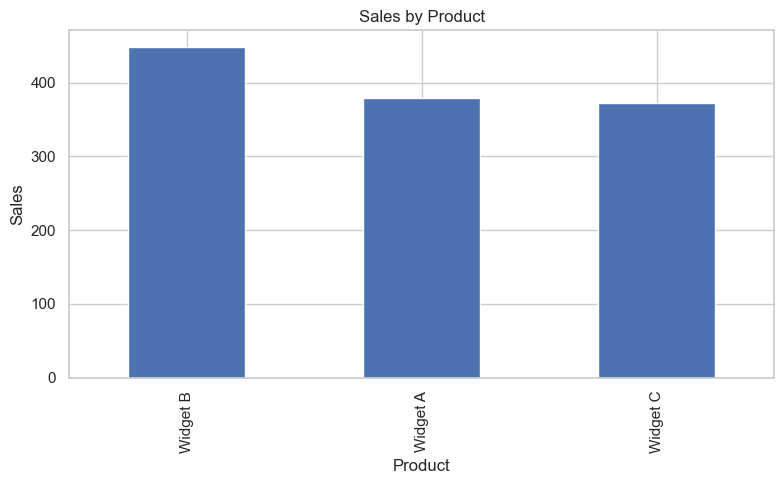

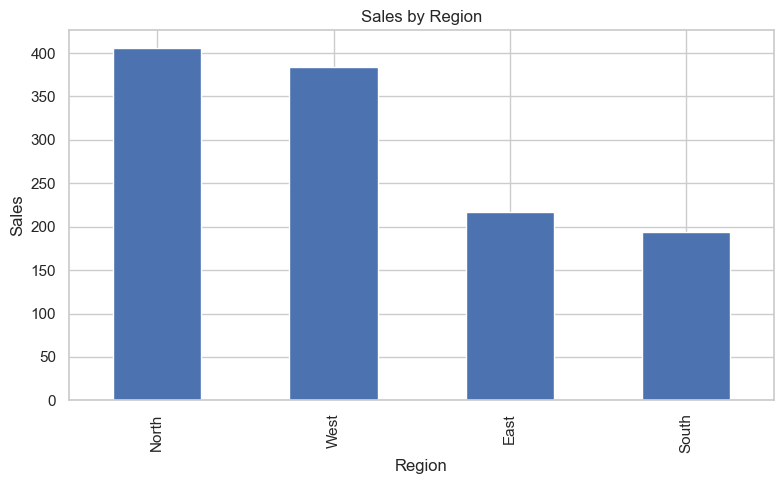

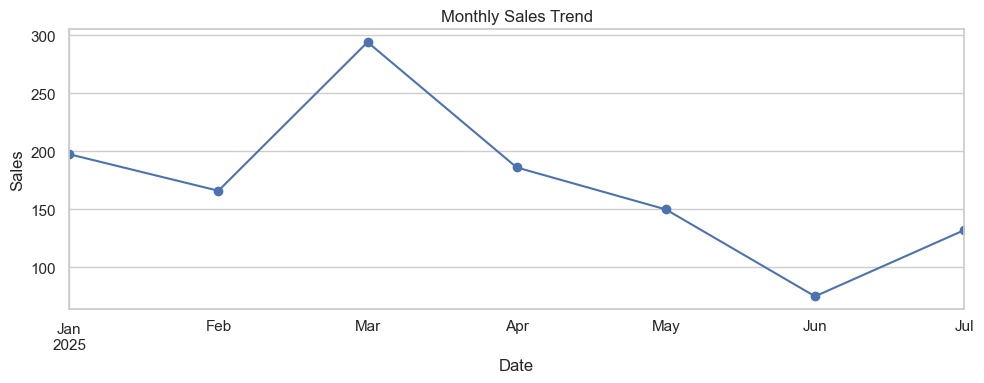

In [9]:
# Cell 7 - plots (saved to files)
plt.figure(figsize=(8,5))
prod_sales.plot(kind='bar')
plt.title('Sales by Product')
plt.ylabel('Sales')
plt.tight_layout()
plt.savefig('sales_by_product.png', dpi=150)
plt.show()

plt.figure(figsize=(8,5))
region_sales.plot(kind='bar')
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.tight_layout()
plt.savefig('sales_by_region.png', dpi=150)
plt.show()

plt.figure(figsize=(10,4))
monthly_sales.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.tight_layout()
plt.savefig('monthly_sales_trend.png', dpi=150)
plt.show()


## Insights (example)
- Top product: *replace this with the top product shown above*
- Top region: *replace with top region*
- Monthly trend: *note if sales rise or fall in plotted months*
